In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from skimage import io
import pandas as pd
import datetime

In [4]:
image_collection = io.imread_collection('E:/TSA/Qazvin_ET/*.tif')
print('Image Collection Shape : ', np.shape(image_collection))

Image Collection Shape :  (487, 341, 512)


In [5]:
all_images = io.concatenate_images(image_collection)
all_images = all_images / 10

In [6]:
nums = [np.mean(i[i<=32761])for i in all_images]
nums = np.array(nums)

In [7]:
stack = np.stack([image_collection[5], image_collection[10], image_collection[15]], axis=2)

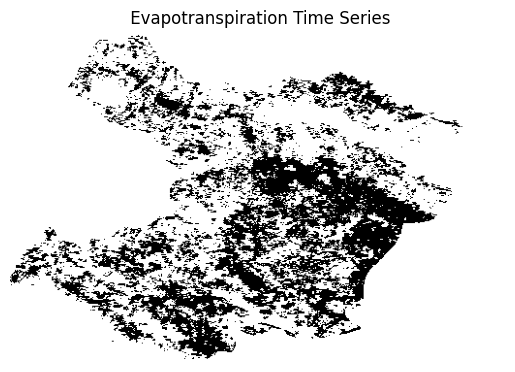

In [9]:
plt.figure()
plt.imshow(image_collection[5], cmap='gray')
plt.title(' Evapotranspiration Time Series')
plt.axis('off')
plt.show()

In [10]:
dates = [i.split('doy')[1].split('_')[0] for i in image_collection.files]

In [11]:
print('Start Date : ', dates[0])
print('End Date : ', dates[-1])

Start Date :  2009361
End Date :  2020201


In [12]:
df = pd.DataFrame()
df['Kg/m2'] = nums
df['date'] = dates

In [13]:
def convert(date):
    new_date = datetime.datetime.strptime(str(date), '%Y%j')
    return new_date

In [14]:
df['date'] = df['date'].apply(convert)

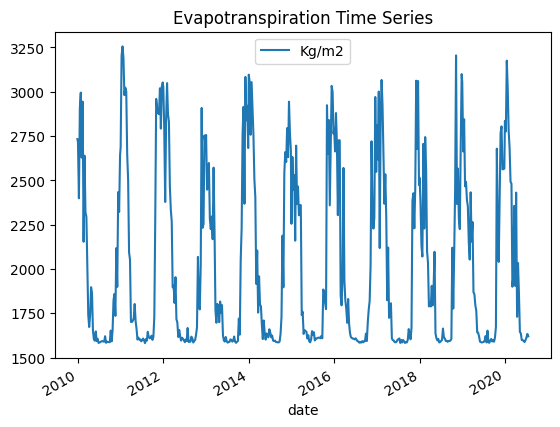

In [15]:
df.plot(x='date' , y='Kg/m2' )
plt.title('Evapotranspiration Time Series')
plt.show()

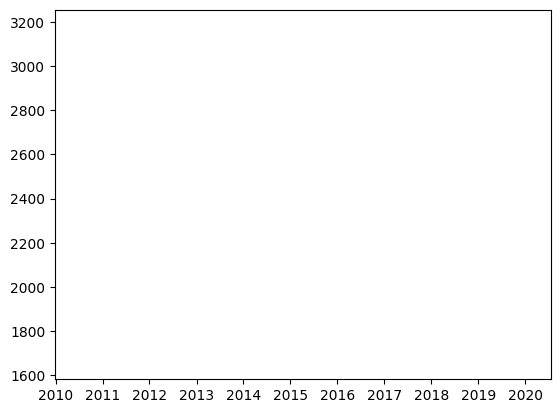

In [16]:
fig = plt.figure()
ax  = plt.axes(xlim=(np.datetime64(np.min(df['date'])),
np.datetime64(np.max(df['date']))), ylim=(min(df['Kg/m2']), 
max(df['Kg/m2'])))

In [17]:
line, = ax.plot([], [], lw=2)
xdata , ydata = [], []

In [19]:
def animate(i):
    x = np.datetime64(df['date'][i])
    y = df['Kg/m2'][i]
    
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

In [20]:
anim = ani.FuncAnimation(fig , animate, interval=10, blit=True)
plt.show()

C:\Users\arad7\AppData\Local\Temp\ipykernel_14720\1076130707.py:1: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = ani.FuncAnimation(fig , animate, interval=10, blit=True)
